<h1>Table of Contents (Clickable in sidebar)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#The-revised-research-question" data-toc-modified-id="The-revised-research-question-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>The revised research question</a></span></li><li><span><a href="#Libraries,---modules-and-orientation" data-toc-modified-id="Libraries,---modules-and-orientation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries,   modules and orientation</a></span></li><li><span><a href="#Combine-CCKP--Timeseries-Files-and-Add-a-CountryYear-Key" data-toc-modified-id="Combine-CCKP--Timeseries-Files-and-Add-a-CountryYear-Key-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Combine CCKP  Timeseries Files and Add a CountryYear Key</a></span></li><li><span><a href="#The-Climate-Change-Knowledge-Portal.-(n.d.).-Retrieved-February-20,-2023,-from-https://climateknowledgeportal.worldbank.org/" data-toc-modified-id="The-Climate-Change-Knowledge-Portal.-(n.d.).-Retrieved-February-20,-2023,-from-https://climateknowledgeportal.worldbank.org/-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>The Climate Change Knowledge Portal. (n.d.). Retrieved February 20, 2023, from <a href="https://climateknowledgeportal.worldbank.org/" rel="nofollow" target="_blank">https://climateknowledgeportal.worldbank.org/</a></a></span></li><li><span><a href="#The-FAOSTAT-and-CCKP-data-become-one!" data-toc-modified-id="The-FAOSTAT-and-CCKP-data-become-one!-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The FAOSTAT and CCKP data become one!</a></span></li><li><span><a href="#Balancing-Statistical-confidence--with-model-simplicity" data-toc-modified-id="Balancing-Statistical-confidence--with-model-simplicity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Balancing Statistical confidence  with model simplicity</a></span></li><li><span><a href="#Processing-predictor-data" data-toc-modified-id="Processing-predictor-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Processing predictor data</a></span><ul class="toc-item"><li><span><a href="#Image-below-shows-download-control-panel" data-toc-modified-id="Image-below-shows-download-control-panel-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Image below shows download control panel</a></span></li><li><span><a href="#Basic-code-is-explained-line-by-line-below" data-toc-modified-id="Basic-code-is-explained-line-by-line-below-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Basic code is explained line by line below</a></span></li><li><span><a href="#Rationale-for-data-frame-reductions--and-other-EDA-decisions" data-toc-modified-id="Rationale-for-data-frame-reductions--and-other-EDA-decisions-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Rationale for data frame reductions  and other EDA decisions</a></span><ul class="toc-item"><li><span><a href="#Post-2002-missing-data-beahavior" data-toc-modified-id="Post-2002-missing-data-beahavior-7.3.1"><span class="toc-item-num">7.3.1&nbsp;&nbsp;</span>Post 2002 missing data beahavior</a></span></li><li><span><a href="#Top-EU-Cattle-Stock-Countries" data-toc-modified-id="Top-EU-Cattle-Stock-Countries-7.3.2"><span class="toc-item-num">7.3.2&nbsp;&nbsp;</span>Top EU Cattle Stock Countries</a></span></li><li><span><a href="#Further-variables" data-toc-modified-id="Further-variables-7.3.3"><span class="toc-item-num">7.3.3&nbsp;&nbsp;</span>Further variables</a></span></li><li><span><a href="#Pascal" data-toc-modified-id="Pascal-7.3.4"><span class="toc-item-num">7.3.4&nbsp;&nbsp;</span>Pascal</a></span></li><li><span><a href="#Rename" data-toc-modified-id="Rename-7.3.5"><span class="toc-item-num">7.3.5&nbsp;&nbsp;</span>Rename</a></span></li><li><span><a href="#Replace" data-toc-modified-id="Replace-7.3.6"><span class="toc-item-num">7.3.6&nbsp;&nbsp;</span>Replace</a></span></li></ul></li></ul></li></ul></div>

# Data Wrangling   for Irish Beef 

## The revised research question
How has Ireland's beef sector performed compared to the EU 27 countries since 2000, and can we forecast future prices using this historical data? Additionally, what can we learn from sentiment analysis of the beef industry during this time period? By focusing on data from 2000 onwards, we can better capture the current state of the beef industry and make more relevant predictions about future trends. 
## Libraries,   modules and orientation

In [1]:

### Data Manipulation and Analysis
import csv
import pandas as pd
import numpy as np
import fancyimpute
import missingno as msno
from functools import partial, reduce
### Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.image as mpimg
### Statistical Analysis
from scipy.stats import ks_2samp, shapiro
### Machine Learning
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import LinearSVR
### Text Processing
import html
import re
import inflection
### Country Information
from countryinfo import CountryInfo
import pycountry
from countrygroups import EUROPEAN_UNION
### File System and OS
import glob
import os
from IPython.display import display, HTML
### Date and Time
import datetime
import time
### Data Presentation
from tabulate import tabulate
from IPython.display import HTML, Image, display

### Data Types
from typing import Dict, List, Tuple
import warnings

# Filter out the FutureWarning with the level keyword
# warnings.filterwarnings('ignore', message='Using the level keyword in DataFrame and Series aggregations is deprecated')

# Reset the warning filter to default
# warnings.filterwarnings('default')



In [2]:


# print(os.listdir('rain'))
# print(os.listdir('temperature'))
# # create a list of HTML strings for each file name
# html_list = ["<tr><td>{}</td><td>{}</td></tr>".format(file_list[i], file_list[i+1]) 
#              for i in range(0, len(file_list), 2)]

# # combine the HTML strings into a table
# html_table = "<table>{}</table>".format("".join(html_list))

# # display the table in the notebook output window
# display(HTML(html_table))



##  Combine CCKP  Timeseries Files and Add a CountryYear Key

The combine_timeseries_files function reads multiple CSV files from the rain or temperature subfolders.Referencing the first five rows of Rain_IRL_df  below  the first unnamed column gives the year and based on position the name of the country is extracted. The function then forms a Key by concatrenating the Country and Year values together. This 'Key' column  will be  used to merge with our Cattle Stocks data   to single dataframe. It filters to only include the first two columns, which are Year and corresponding weather measurements and as such, it drops all redundant regional readings. The resulting dataframe contains the weather data of 27 European countries.

In [3]:
import pandas as pd

# Read the first two rows of data, with headers in the second row
Rain_IRL_df = pd.read_csv('rain/pr_timeseries_annual_cru_1901-2021_IRL.csv', header=1, nrows=2)

# Show the dataframe
Rain_IRL_df.head()

,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,1068.52,983.20,1018.93,1055.24,1153.06,1288.02,942.31,1044.95,1323.52,...,933.47,933.47,851.14,1008.41,1206.83,1030.92,1129.96,901.61,988.85,978.16
1,1902,1016.31,965.42,939.44,1004.48,1119.44,1167.77,934.83,984.17,1277.05,...,864.39,864.39,831.83,943.86,1087.75,1002.13,1101.99,852.81,967.98,966.45




## The Climate Change Knowledge Portal. (n.d.). Retrieved February 20, 2023, from https://climateknowledgeportal.worldbank.org/

The Climate Change Knowledge Portal. (n.d.). Retrieved February 20, 2023, from https://climateknowledgeportal.worldbank.org/
To maintain consistency with the FAO data, annual and not monthly time series  aggregates were taken from the Climatic Research Unit (CRU) dataset for **precipitation** and   **mean-temperature**. These datasets are provided by the CRU TS 4.04 dataset, a gridded climate dataset produced by the Climatic Research Unit (CRU) at the University of East Anglia in the United Kingdom. In the statistics section, range, variance, and standard deviation of monthly data may be revisited for insights.

The file names and folder names of the CCKP data used in this project are tabulated below.

<span style="font-size: 24px;">     </span>
        
All datasets from the CCKP are licensed under the Creative Commons Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO). 
Source: CCKP (2023). Time Series datasets. Retrieved from [https://climateknowledgeportal.worldbank.org/download-data].

In [4]:
def combine_timeseries_files(path: str, subfolder: str, col_name: str) -> pd.DataFrame:
    """Reads in all CSV files in the given subfolder of the directory, renames the first unnamed column based on its position,
    and combines the resulting dataframes together into a single dataframe.
    Args:
        path (str): The relative path of the directory containing the data.
        subfolder (str): The name of the subfolder within the directory to read the CSV files from.
        col_name (str): The name to assign to the specified column in the resulting dataframe.
    Returns:
        pandas.DataFrame: The resulting dataframe after combining data from all CSV files in the specified subfolder.
    """
    try:
        folder_path = os.path.join(path, subfolder)
        csv_filenames = glob.glob(folder_path + "/*.csv")
        # Read in all CSV files, rename the first unnamed column based on position, and filter to only include the 'key' and specified column
        processed_dfs = []
        for filename in csv_filenames:
            file_path = os.path.join(path, subfolder, os.path.basename(filename))
            df = pd.read_csv(file_path, on_bad_lines='skip', skiprows=1)
            if df.columns[0].startswith("Unnamed"):
                df.rename(columns={df.columns[0]: "Year"}, inplace=True)
            df['Key'] = df.columns[1] + df['Year'].astype(str)
            df.rename(columns={df.columns[1]: col_name}, inplace=True)
            df = df.filter(['Key', col_name])
            processed_dfs.append(df)
        # Concatenate all dataframes into a single dataframe
        df = pd.concat(processed_dfs, ignore_index=True)
        return df
    except Exception as e:
        print(f"Error combining CSV files in folder {folder_path}: {e}")

## The FAOSTAT and CCKP data become one!

In [5]:
# Rmmy stands for rain in mm/year
rain_df = combine_timeseries_files('', 'rain', 'Rmmy')
# save the rain DataFrame to a CSV file
rain_df.to_csv('clean/rain.csv', index=False)
rain_df.head(2)

,Key,Rmmy
0,Austria1901,1052.84
1,Austria1902,1061.55


In [6]:
temperature_df = combine_timeseries_files('', 'temperature', 'T\u00b0C')
# save the rain DataFrame to a CSV file
temperature_df.to_csv('clean/temperature.csv', index=False)
temperature_df.tail(2)

,Key,T°C
3265,Sweden2020,4.47
3266,Sweden2021,3.02


In [7]:
# Cleaned file saved in 'beef/clean folder' in first notebook
main_df = pd.read_csv('clean/stock.csv')# loads the cleaned cattle stock  CSV file to pandas DataFrame n df
main_df.sample(4)

,Country,Year,Stock
196,Finland,2020,835380
369,Lithuania,2017,694752
79,Croatia,2013,442000
25,Belgium,2003,2778077


In [8]:
# assuming the dataframe is called 'df'
main_df['Key'] = main_df['Country'].str.cat(main_df['Year'].astype(str), sep='_')
main_df

,Country,Year,Stock,Key
0,Austria,2000,2152811,Austria_2000
1,Austria,2001,2155447,Austria_2001
2,Austria,2002,2118454,Austria_2002
3,Austria,2003,2066942,Austria_2003
4,Austria,2004,2052033,Austria_2004
...,...,...,...,...
589,Sweden,2017,1448590,Sweden_2017
590,Sweden,2018,1435450,Sweden_2018
591,Sweden,2019,1404670,Sweden_2019
592,Sweden,2020,1390960,Sweden_2020


In [9]:
"""
Adds a unique key column to our dataframe 
based on the "Country" and "Year" columns by casting year to string type.
"""
main_df['Key'] = main_df['Country'] + main_df['Year'].astype(str)# adds a unique key column 
main_df


,Country,Year,Stock,Key
0,Austria,2000,2152811,Austria2000
1,Austria,2001,2155447,Austria2001
2,Austria,2002,2118454,Austria2002
3,Austria,2003,2066942,Austria2003
4,Austria,2004,2052033,Austria2004
...,...,...,...,...
589,Sweden,2017,1448590,Sweden2017
590,Sweden,2018,1435450,Sweden2018
591,Sweden,2019,1404670,Sweden2019
592,Sweden,2020,1390960,Sweden2020


In [10]:
main_df = pd.merge(main_df, rain_df, on='Key')
main_df.head()

,Country,Year,Stock,Key,Rmmy
0,Austria,2000,2152811,Austria2000,1171.79
1,Austria,2001,2155447,Austria2001,1058.36
2,Austria,2002,2118454,Austria2002,1212.56
3,Austria,2003,2066942,Austria2003,891.80
4,Austria,2004,2052033,Austria2004,1080.30


In [11]:
main_df = pd.merge(main_df, temperature_df, on='Key')
main_df

,Country,Year,Stock,Key,Rmmy,T°C
0,Austria,2000,2152811,Austria2000,1171.79,7.97
1,Austria,2001,2155447,Austria2001,1058.36,7.03
2,Austria,2002,2118454,Austria2002,1212.56,7.73
3,Austria,2003,2066942,Austria2003,891.80,7.35
4,Austria,2004,2052033,Austria2004,1080.30,6.75
...,...,...,...,...,...,...
589,Sweden,2017,1448590,Sweden2017,678.22,3.16
590,Sweden,2018,1435450,Sweden2018,539.63,3.62
591,Sweden,2019,1404670,Sweden2019,682.36,3.34
592,Sweden,2020,1390960,Sweden2020,669.34,4.47


In [12]:
#### Snake
def snake(text, default='default'):
    """
    Converts a given string to snake_case by replacing any whitespace characters with underscores,
    converting to all lowercase, and removing any non-alphanumeric characters from the beginning and end.

    Parameters:
        text (str): The string to convert to snake_case.
        default (str): The default value to return if the input text is empty.

    Returns:
        str: The resulting string in snake_case format, or the default value if the input text is empty.
    """
    if not text:
        return default
    # Convert to string and replace any non-alphanumeric characters at the beginning and end with an empty string
    text = re.sub(r'^\W+|\W+$', '', str(text))
    # Replace any period symbols with underscores
    text = text.replace('.', '')
    # Replace any other non-alphanumeric characters with empty strings
    text = re.sub(r'\W+', '_', text)
    # Convert to all lowercase
    text = text.lower()
    return text

# Example usage:
text = "This is a text with pe,  ,  ,  ,riods. (And other characters   .)"
result = snake(text)
print(result)  # Output: "this_is_a_text_with_periods_and_other_characters"


# snake('does snake Work')

# snake('                  ')
# snake('                  ')
# snake('                  ')

this_is_a_text_with_pe_riods_and_other_characters


##  Balancing Statistical confidence  with model simplicity

- The extent of the data we use in terms of Countries, Time, Variables can be narrrowed while solving missing values issues 
- Sample size: The larger the sample size, the smaller the confidence interval will be.
- At the same time the sample size across variables , time and counries must be sufficient to provide reliable results.But we will still further cut countries and years in the interest of simplicity and processing times.
- Margin of error: The margin of error is the range of values within which the realised future  predictions of production nd price will likely lie.
-  By reducing the margin of error, the confidence interval becomes smaller.
- Significance level: The significance level is the probability of rejecting the null hypothesis when it is actually true. By using a smaller significance level (e.g., 0.01 instead of 0.05), the confidence interval will be narrower.
- Confidence level: The confidence level is the degree of certainty that the population parameter falls within the confidence interval. By increasing the confidence level (e.g., from 90% to 95%), the confidence interval will become wider, but the predictions will be more reliable.
- Model complexity: By using simpler models with fewer parameters, the predictions may be more focused and easier to interpret. 
- We will prepare a wide range of data but agressively jettison most of it during pre-processing.
- Variable selection: Choosing the most relevant variables will be based on the data not hunches.
- Data quality: Ensuring that the data is accurate, complete, and representative of the population of interest can help to reduce uncertainty and increase the precision of the predictions.
- Using the 'nutrient.csv' data to  narrow  range of data
- Overall, a combination of all of these  factors can help to ensure that statistical research results are reliable, actionable, and focused while keeping processing loads and project comlpexity under control.



## Processing predictor data
### Image below shows download control panel
- db [https://www.fao.org/faostat/en/#data/domains_table](https://www.fao.org/faostat/en/#data/domains_table) /Land, Inputs and Sustainability/Inputs/ Fertilizers by Nutrient
- The  image below demonstrates retrieval settings for 'Fertilizers by Nutrient' database was 
- European Union (27) > (List) 
- >1999 as per revised research question
- All 'Items' and All 'Elemement' selected for later grouping
![image1](images/beef002.png)

### Basic code is explained line by line below

In [13]:
# Read in the original/source/raw DataFrame
df = pd.read_csv('raw/nutrient.csv')
# filter for time
df = df[df['Year'] >= 2000]
# remove  "Belgium-Luxembourg" based on 01...ijpnb decision
df = df[df['Area'] != 'Belgium-Luxembourg']
# rename the 'Area' column to 'Country' 
df = df.rename(columns={'Area': 'Country'})
# create a 'Key' column by concatenating 'Country' and 'Year'
df['Key'] = df['Country'] + df['Year'].astype(str)
# keep required varient columns
df = df[['Country','Year','Element','Item', 'Value','Key']]
# Convert  values in the Item  and Element columns to clean snake
df['Item'] = df['Item'].apply(snake)
df['Element'] = df['Element'].apply(snake)
# Generate item and element lists as per image above
item_df=df['Item'].unique()
element_df = df['Element'].unique()
# Print several objects for critical thinking and EDA
print(df.columns)
print(df['Element'].unique())
print(df['Item'].unique())
# print the final dataframe
df.head()

Index(['Country', 'Year', 'Element', 'Item', 'Value', 'Key'], dtype='object')
['production' 'import_quantity' 'export_quantity' 'agricultural_use']
['nutrient_nitrogen_n_total' 'nutrient_phosphate_p2o5_total'
 'nutrient_potash_k2o_total']


,Country,Year,Element,Item,Value,Key
39,Austria,2000,production,nutrient_nitrogen_n_total,186000.0,Austria2000
40,Austria,2001,production,nutrient_nitrogen_n_total,216000.0,Austria2001
41,Austria,2002,production,nutrient_nitrogen_n_total,NaN,Austria2002
42,Austria,2003,production,nutrient_nitrogen_n_total,NaN,Austria2003
43,Austria,2004,production,nutrient_nitrogen_n_total,NaN,Austria2004


In [14]:

# get the unique combinations of Element and Item
combinations = df[['Element', 'Item']].drop_duplicates()
# loop through all combinations of Element and Item
for i, row in combinations.iterrows():
    # get the current combination of Element and Item
    e = row['Element']
    it = row['Item']    
    # create a DataFrame for the current combination
    df_name = f"{e}_{it}_df"
    globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)


In [15]:
# Calculate the number of missing values for each country and year
missing_values = df.groupby(['Country', 'Year'])['Value'].apply(lambda x: x.isna().sum())
# Reshape the data to a pivot table for plotting
missing_values = missing_values.unstack('Country')
snake('Missing Values by Country and Year')

'missing_values_by_country_and_year'

### Rationale for data frame reductions  and other EDA decisions


- Decision to drop 2000, 2001 and 2002 is based on heatmap below
- A visual inspection of missing data shows almost all countries in our sample have disproportionate levels of missing data in 2000 and 2001
- That is why 2000 and 2001 are cut

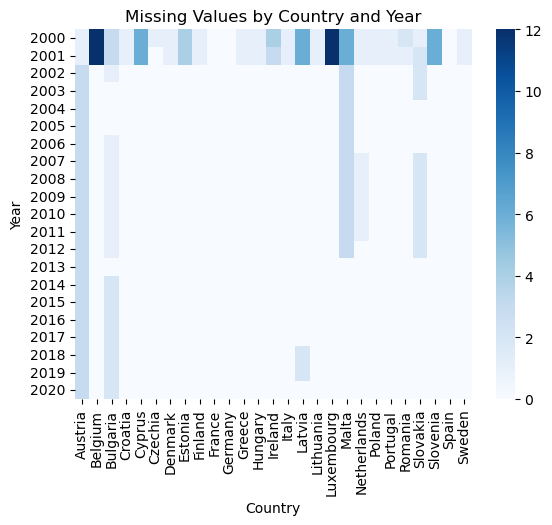

In [16]:
# Heatmap of missing values
sns.heatmap(missing_values, cmap='Blues')
plt.title('Missing Values by Country and Year')
plt.show()

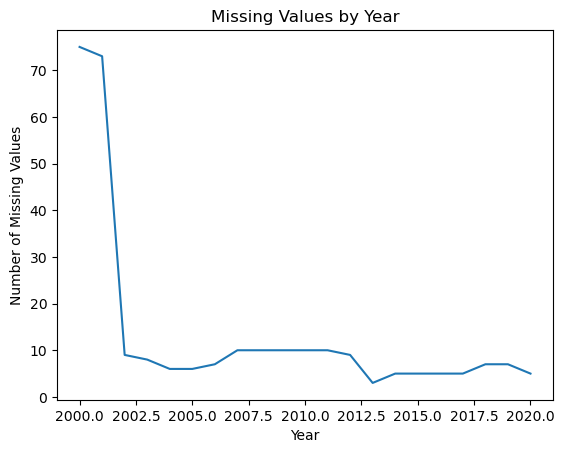

In [17]:
# Missing value count by year
missing_by_year = missing_values.sum(axis=1)
plt.plot(missing_by_year.index, missing_by_year.values)
plt.title('Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

In [ ]:
# Missing value count by year
missing_by_year = missing_values.sum(axis=1)
plt.plot(missing_by_year.index, missing_by_year.values)
plt.title('Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

# Top 10 countries with the most missing values
top_10_countries = missing_by_country.nlargest(10).index.tolist()

# Missing value count by year for top 10 countries
missing_top_10 = missing_values[top_10_countries]
plt.plot(missing_top_10.index, missing_top_10.values)
plt.legend(top_10_countries)
plt.title('Missing Values by Year for Top 10 Countries')
plt.xlabel('Year')
plt.ylabel('Number of Missing Values')
plt.show()

# Percentage of missing values by country
missing_percentage = missing_values.apply(lambda x: x.isna().sum()/len(x))
plt.bar(missing_percentage.index, missing_percentage.values)
plt.title('Percentage of Missing Values by Country')
plt.xlabel('Country')
plt.ylabel('Percentage of Missing Values')
plt.show()

# Percentage of missing values by year
missing_percentage_by_year = missing_values.apply(lambda x: x.isna().sum()/len(x.index))
plt.plot(missing_percentage_by_year.index, missing_percentage_by_year.values)
plt.title('Percentage of Missing Values by Year')
plt.xlabel('Year')
plt.ylabel('Percentage of Missing Values')
plt.show()

# Percentage of missing values for top 10 countries
missing_percentage_top_10 = missing_percentage[top_10_countries]
plt.bar(missing_percentage_top_10.index, missing_percentage_top_10.values)
plt.title('Percentage of Missing Values for Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Percentage of Missing Values')
plt.show()

# Distribution of missing values by country and year
missing_values_stacked = missing_values.stack().reset_index()
missing_values_stacked.columns = ['Year', 'Country', 'Missing Values']
sns.lineplot(data=missing_values_stacked, x='Year', y='Missing Values', hue='Country')
plt.title('Distribution of Missing Values by Country and Year')
plt.show()

# Density plot of missing values by year
sns.kdeplot(missing_by_year, shade=True)
plt.title('Density Plot of Missing Values by Year')
plt.xlabel('Number of Missing Values')
plt.show()

# Box plot of missing values by country
missing_values_melted = missing_values.melt(var_name='Country', value_name='Missing Values')
sns.boxplot(data=missing_values_melted, x='Country', y='Missing Values')
plt.title('Box Plot of Missing Values by Country')
plt.show()



Verification  and Culling countries

A visual inspection now suggest we drop the 

#### Post 2002 missing data beahavior
- Post 2002 missing data beahavior is exclusive to these 5 countries
- This is an ordered list
- Austria had the most missing data
- The Netherlands the least

| Index | Country     |
|-------|-------------|
| 1     | Austria     |
| 2     | Malta       |
| 3     | Bulgaria    |
| 4     | Slovakia    |
| 5     | Netherlands |

- Strategy solves a missing data problem 
- While meeting project aim to jettison data
- We see the Netherlands is 7th in the average stock league table 
- We could simply remove it 
- or we could simplify the project greatly and narrow our research question to the top 6 producers?
- The ML stage will infor this

#### Top EU Cattle Stock Countries

| Index | Country      |
|-------|--------------|
| 1     | France       |
| 2     | Germany      |
| 3     | Ireland      |
| 4     | Spain        |
| 5     | Italy        |
| 6     | Poland       |
| 7     | Netherlands  |
| 8     | Belgium      |

####  Further variables

- Here we only looked at the Soil Nutrient data 
- From it we decided to remove 2000 and 2001 
- Furthermore we removed 5 countries including the 7th in the stock league tables
- We may narrow our zone of interest further but will import and grow our main data file based on the YearCountry merging key and unique Element Item combos
- Finally we will keep the headers painfully abreviated but generate a data dictionary for clarity of communifiaction

In [ ]:
df = df[df['Year'] >= 2002]

df.to_csv('clean/nutrient2002.csv', index=False)
# Calculate the number of missing values for each country and year
missing_values = df.groupby(['Country', 'Year'])['Value'].apply(lambda x: x.isna().sum())

# Reshape the data to a pivot table for plotting
missing_values = missing_values.unstack('Country')

# Heatmap of missing values
sns.heatmap(missing_values, cmap='Blues')
plt.title('Missing Values by Country and Year')
plt.show()

# Read the text topstock.txt file into a DataFrame
toppers= pd.read_csv('clean/topstock.txt', sep='\t', header=None)




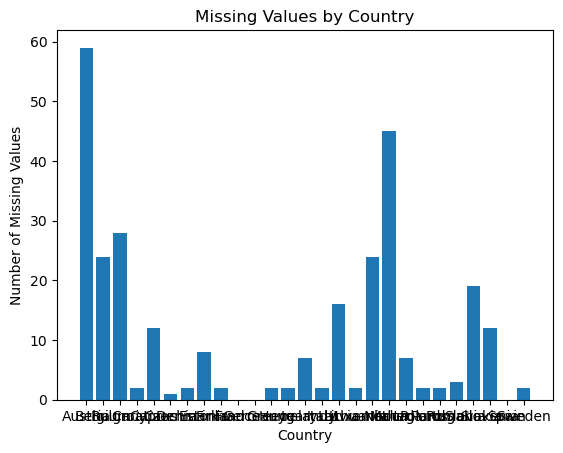

In [26]:
# Missing value count by country
missing_by_country = missing_values.sum()
plt.bar(missing_by_country.index, missing_by_country.values)
plt.title('Missing Values by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missing Values')
plt.show()

In [ ]:
# Calculate the number of missing values for each country and year
missing_values = df.groupby(['Country', 'Year'])['Value'].apply(lambda x: x.isna().sum())

# Reshape the data to a pivot table for plotting
missing_values = missing_values.unstack('Country')

# Heatmap of missing values
sns.heatmap(missing_values, cmap='Blues')
plt.title('Missing Values by Country and Year')
plt.show()
# Heat map is clear


In [ ]:
# Missing value count by country
missing_by_country = missing_values.sum()
plt.bar(missing_by_country.index, missing_by_country.values)
plt.title('Missing Values by Country')
plt.xlabel('Country')
plt.ylabel('Number of Missing Values')
plt.show()

In [27]:

droppedCountries = ['Austria', 'Malta', 'Bulgaria', 'Slovakia', 'Netherlands','Latvia']

# Read the saved csv file back into a dataframe
df = pd.read_csv('clean/nutrient2002')

# Drop the rows for the countries in droppedCountries
df = df[~df['Country'].isin(droppedCountries)]

df.shape


(4788, 6)

In [ ]:


# assuming your dataframe is called "df"
# get the unique combinations of Element and Item
combinations = df[['Element', 'Item']].drop_duplicates()

# loop through all combinations of Element and Item
for i, row in combinations.iterrows():
    # get the current combination of Element and Item
    e = row['Element']
    it = row['Item']
    
    # create a DataFrame for the current combination
    df_name = f"{e}_{it}_df"
    globals()[df_name] = df[(df['Element'] == e) & (df['Item'] == it)].reset_index(drop=True)

# print a list of the DataFrames created
df_list = [var for var in globals() if var.endswith('_df')]
df_list


In [ ]:
production_nutrient_nitrogen_n_total_df

In [ ]:


# # Define a function to create a new DataFrame for a given group
# def create_df(group):
#     element_name = group['Element'].iloc[0]
#     item_name = group['Item'].iloc[0]
#     new_df = group.copy()
#     new_df['Element'] = element_name
#     new_df['Item'] = item_name
#     new_df.columns = [inflection.underscore(col) for col in new_df.columns] # rename columns to snake_case
#     df_name = f'{inflection.underscore(element_name)}_{inflection.underscore(item_name)}'
#     return df_name, new_df

# # Group the original dataframe by Element and Item, and loop through the resulting groups to create new DataFrames
# dfs = {}
# for (element, item), group in df.groupby(['Element', 'Item']):
#     df_name, new_df = create_df(group)
#     dfs[df_name] = new_df

# # Print the resulting DataFrames
# for name, df in dfs.items():
#     print(name)
# df

In [ ]:
create_df('df')

In [ ]:
replace_dict = {'Nutrient nitrogen N (total)': 'N', 'Nutrient phosphate P2O5 (total)': 'P2O5', 'Nutrient potash K2O (total)': 'K2O'}

In [ ]:
df['Item'] = df['Item'].replace(replace_dict)
item=df['Item'].unique()
item

In [ ]:
df['Item'] = df['Item'].apply(snake)
item=df['Item'].unique()
item

In [ ]:
coun= df_11['Area'].unique()
coun

In [ ]:
df_11 = df[(df['Element'] == 'production') & (df['Item'] == 'N')]
df_12 = df[(df['Element'] == 'production') & (df['Item'] == 'P2O5')]
df_13 = df[(df['Element'] == 'production') & (df['Item'] == 'K20')]
df_14 = df[(df['Element'] == 'import_quantity') & (df['Item'] == 'N')]
df_15 = df[(df['Element'] == 'import_quantity') & (df['Item'] == 'P2O5')]
df_16 = df[(df['Element'] == 'import_quantity') & (df['Item'] == 'K20')]
df_17 = df[(df['Element'] == 'export_quantity') & (df['Item'] == 'N')]
df_18 = df[(df['Element'] == 'export_quantity') & (df['Item'] == 'P2O5')]
df_19 = df[(df['Element'] == 'export_quantity') & (df['Item'] == 'K20')]
df_20 = df[(df['Element'] == 'agricultural_use') & (df['Item'] == 'N')]
df_21 = df[(df['Element'] == 'agricultural_use') & (df['Item'] == 'P2O5')]
df_22 = df[(df['Element'] == 'agricultural_use') & (df['Item'] == 'K20')]

In [ ]:
def key(df)
 df['Key'] = df['Country'] + df['Year'].astype(str)# adds a unique key column 



In [ ]:
p2o5_production_df=df_12
p2o5_production_df



In [ ]:

# Create a dictionary of DataFrames for each unique pair of Element and Item
groups = df.groupby(['Element', 'Item'])
dfs = {}
for name, group in groups:
    dfs[name] = group

# Print the contents of each DataFrame
for name, df in dfs.items():
    print(f"DataFrame for Element '{name[0]}' and Item '{name[1]}':")
    print(df)

In [ ]:
dfs[1]

In [ ]:
# Group the DataFrame by 'Element' and 'Item'
groups = df.groupby(['Element', 'Item'])

In [ ]:
# Group the DataFrame by Element and Item
grouped = nutrient_df.groupby(['Element', 'Item'])

In [ ]:
for name, group in groups:
    element, item = name
    filename = f"{element}_{item}.csv"
    group.to_csv(filename, index=False)

In [ ]:
# Loop over each group and create a new DataFrame for each
for name, group in grouped:
    # Create a new DataFrame using the group
    new_df = pd.DataFrame(group)

In [ ]:
# Create an empty dictionary to store the new DataFrames
dfs = {}

# Loop over each group and create a new DataFrame for each
for name, group in grouped:
    # Create a new DataFrame using the group
    new_df = pd.DataFrame(group)
    
    # Get the names of the Element and Item for this group
    element_name = name[0]
    item_name = name[1]
    
    # Create a unique name for this new DataFrame
    df_name = f'{element_name}_{item_name}_df'
    
    # Store the new DataFrame in the dictionary
    dfs[df_name] = new_df

dfs['Nitrogen_Fertilizers_df']

In [ ]:
    
    # Do EDA on the new DataFrame as desired
    # ...
    
    # Store the new DataFrame however you like (e.g. in a dictionary)
    # ...

In [ ]:
# Group by country and item and calculate the mean value
df_grouped = dfs['Production_Crops_Economic'].groupby(['Area', 'Item']).mean()

# Print the first 5 rows
print(df_grouped.head())


In [ ]:
"""We will bring in another predictor manually before automating
The unwanted area and years are filtered out by the process Next  LandCover """
os.listdir('./raw') 

predictor variables to include in the analysis.
-  production volume
- imports
- exports and 
- slaughter numbers.

In [ ]:
import pandas as pd

def read_data(file_path):
    # Read in the data
    df = pd.read_csv(file_path)
    return df

def clean_column_names(df):
    # Replace forward slashes, backslashes, and commas in column names with underscores
    df.columns = df.columns.str.replace('[/\\\\, (,) ,=  ]', '_')
    return df

def clean_element_item_values(df):
    # Replace forward slashes, backslashes, commas, periods, and hyphens in Element and Item values with underscores
    df['Element'] = df['Element'].str.replace('[/\\\\, (,) , =  ]', '_')
    df['Item'] = df['Item'].str.replace('[/\\\\, (,), =   -\.]', '_')
    return df


def drop_rows(df):
    # Drop rows where Area is 'Belgium-Luxembourg'
    df = df[df['Area'] != 'Belgium-Luxembourg']
    return df

def generate_key_column(df):
    # Merge Area and Year columns into a new Key column
    df['Key'] = df['Area'] + '_' + df['Year'].astype(str)
    return df

def filter_dataframes(df):
    # Generate a list of dataframes, with each dataframe filtered by Element and Item
    dfs = []
    for element in df['Element'].unique():
        for item in df['Item'].unique():
            element_item_df = df[(df['Element'] == element) & (df['Item'] == item)]
            if not element_item_df.empty:
                # Replace spaces and decimal points with underscores in dataframe names
                element_item_name = element.replace(' ', '_').replace('.', '_') + '_' + item.replace(' ', '_').replace('.', '_') + '_df'
                dfs.append(element_item_name)
                # Replace spaces and decimal points with underscores in dataframe variable names
                exec(element_item_name.replace(' ', '_').replace('.', '_') + ' = element_item_df')

    # Debugging line: print out the list of dataframe names
    print(dfs)
    
    # Return a dictionary of the dataframes
    return {name: globals()[name] for name in dfs}


def preprocess_data(file_path):
    df = read_data(file_path)
    df = drop_rows(df)
    df = clean_column_names(df)
    df = clean_element_item_values(df)
    return filter_dataframes(df)

#     df = generate_key_column(df)

In [ ]:


# Group by element and item and calculate the mean value
df_grouped = dfs['Production_Crops_Economic'].groupby(['Area', 'Item']).mean()

# Print the first 5 rows
print(df_grouped.head())


In [ ]:
dfs = preprocess_data('raw/nutrient.csv')
print(dfs.keys())

In [ ]:
Yield_Carcass_Weight_Beef_and_Buffalo_Meat__primary_df


In [ ]:
dfs = preprocess_data('raw/beefandbuffalo.csv')
print(dfs.keys())  # prints a list of the names of the processed dataframes


In [ ]:
Yield_Carcass_Weight_Meat_of_cattle_with_the_bone__fresh_or_chilled_df

In [ ]:

def preprocess_data(file_path):
    # Read in the data
    df = pd.read_csv(file_path)

    # Replace forward slashes, backslashes, and commas in column names with underscores
    df.columns = df.columns.str.replace('[/\\\\, ]', '_')

    # Replace forward slashes, backslashes, and commas in Element and Item values with underscores
    df['Element'] = df['Element'].str.replace('[/\\\\, ]', '_')
    df['Item'] = df['Item'].str.replace('[/\\\\, ]', '_')

    # Drop rows where Area is 'Belgium-Luxembourg'
    df = df[df['Area'] != 'Belgium-Luxembourg']

    # Merge Area and Year columns into a new Key column
    df['Key'] = df['Area'] + '_' + df['Year'].astype(str)

    # Generate a list of dataframes, with each dataframe filtered by Element and Item
    dfs = []
    for element in df['Element'].unique():
        for item in df['Item'].unique():
            element_item_df = df[(df['Element'] == element) & (df['Item'] == item)]
            if not element_item_df.empty:
                # Replace spaces with underscores in dataframe names
                element_item_name = element + '_' + item.replace(' ', '_') + '_df'
                dfs.append(element_item_name)
                # Replace spaces with underscores in dataframe variable names
                exec(element_item_name.replace(' ', '_') + ' = element_item_df')

    # Return a dictionary of the dataframes
    return {name: globals()[name] for name in dfs}


In [ ]:
YiCaMe_df=Yield_Carcass_Weight_Meat_of_cattle_with_the_bone__fresh_or_chilled_df

YiCaMe_df


In [ ]:
beefandbuffalo_df = pd.read_csv( 'raw/beefandbuffalo.csv', on_bad_lines='skip')   # loads Land USe Domain
beefandbuffalo_df.head(5)

In [ ]:
dfs = create_dfs(beefandbuffalo_df)
df_names = [name for name, _ in dfs]
df_names

In [ ]:
Producing_Animals_Slaughtered_Beef_and_Buffalo_Meat__primary_df.head()

In [ ]:
df_list = group_by_element_item(beefandbuffalo_df)

# loop over the list and print the name of each dataframe and its first few rows
for i, df in enumerate(df_list):
    print(f"Dataframe {i}: {df.columns[0]} - {df.columns[1]}")
    print(df.head())
    print()


In [ ]:
Dataframe 1

In [ ]:
# iterate over the groups and create new dataframes
for group_name, group_data in grouped_df:
    # create a new dataframe with the group data
    new_df = group_data.copy()

    # append the new dataframe to the list
    df_list.append(new_df)

    # print the first few rows of the new dataframe
    print("New dataframe created: ", group_name)
    new_df.head()

In [ ]:
Production=df_list[1]
Production
# assuming the dataframe is called 'Production'
unique_items = Production['Item'].unique()
print(unique_items)

In [ ]:
# 
grouped_df = beefandbuffalo_df.groupby('Element')

In [ ]:
# iterate over the groups and create new dataframes
for group_name, group_data in grouped_df:
    # create a new dataframe with the group data
    new_df_name = group_name + "_df"
    locals()[new_df_name] = group_data

In [ ]:
# assuming the original dataframe is called 'df'
grouped_df = df.groupby('Element')
df_list = []

In [ ]:
    # print the first few rows of the new dataframe
    print("New dataframe created: ", new_df_name)
    print(locals()[new_df_name].head())

In [ ]:


def filters(df):
    # Delete the "Belgium-Luxembourg" column
    if "Belgium-Luxembourg" in df.columns:
        df = df.drop("Belgium-Luxembourg", axis=1)

    # Filter the "Year" column to only include years greater than or equal to 2000
    df = df[df["Year"] >= 2000]

    return df


In [ ]:
# Get a list of unique countries from the "Area" column
countries = df['Area'].unique()
countries

In [ ]:
# count the number of missing values in each column
missing_values = df.isnull().sum()

# print the result
print(missing_values)

In [ ]:
# Count the number of areas with missing values
num_missing_areas = df['Area'][df.isna().any(axis=1)].nunique()

# Print the result
print("The number of areas with missing values is:", num_missing_areas)


In [ ]:
31900/1708 # 20% data is missing

In [ ]:
df.shape    

In [ ]:
snake('Distribution of Missing Values by Area')

In [ ]:
snake('msno.matrix(df)')

In [ ]:
msno.matrix(df)

In [ ]:
# create a bar chart of the missing value counts by year
plt.figure(figsize=(20,8))  # increase the figure size for better readability
ax = year_counts.plot(kind='bar')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Missing Values', fontsize=14)
plt.title('Distribution of Missing Values by Year', fontsize=18)
plt.xticks(rotation=0, fontsize=12)  # rotate x-axis labels to 0 degrees
ax.tick_params(axis='y', labelsize=12)  # adjust y-axis label size
ax.tick_params(axis='x', pad=10)  # adjust x-axis tick padding

# add value labels to the bars
for i, v in enumerate(year_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold', fontsize=12)

# set year labels vertically
ax.set_xticklabels(year_counts.index, rotation=90)

plt.show()


In [ ]:
""" 
A new dataframe with counts of missing values 
for each country was sorted in descending order
revealing  the top 10 countries

"""


# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=False)

# get the top 10 countries with the most missing values
top_10_countries = country_counts.head(10)

# print the list of top 10 countries
print(top_10_countries)

In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0].index

# print the list of countries with missing values
print("Countries with missing values:\n", missing_countries)


In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0].index

# print the list of countries with missing values
print("Countries with missing values:\n", missing_countries)


In [ ]:
# create a new dataframe to hold the counts of missing values by country
country_counts = df.isnull().sum(axis=1).groupby(df.Area).sum().sort_values(ascending=True)

# get the list of countries with any missing values
missing_countries = country_counts[country_counts > 0]

# create a new dataframe with the missing value counts and the total number of observations for each country
mv_counts = pd.concat([missing_countries, df.groupby('Area').size()], axis=1)
mv_counts.columns = ['Missing Values', 'Total Observations']

# calculate the proportion of missing values for each country
mv_counts['% Missing'] = mv_counts['Missing Values'] / mv_counts['Total Observations'] * 100

# sort the dataframe by the proportion of missing values in descending order
mv_counts = mv_counts.sort_values('% Missing', ascending=False)

# display the table
print(mv_counts.to_string())


In [ ]:

# group the data by Area and compute the total count of missing values for each group
area_counts = df.isnull().sum(axis=1).groupby(df.Area).sum()

# create a bar chart of the missing value counts by Area
plt.figure(figsize=(10,5))
ax = area_counts.plot(kind='bar')
plt.xlabel('Area')
plt.ylabel('Number of Missing Values')
plt.title('Distribution of Missing Values by Area')
plt.xticks(rotation=45)

# add value labels to the bars
for i, v in enumerate(area_counts):
    ax.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')

plt.show()

In [ ]:
df.dtypes

In [ ]:
"""
#### Title 
The 'title' naming convention is where each word starts
with a capital letter, except for prepositions and conjunctions, which start with a lowercase letter. 
The function takes a string as input and converts it to title case, 
where the first letter of each non-conjunction/preposition word is capitalized, and all other letters are lowercase.
It achieves this by splitting the input string into a list of words, identifying which words are prepositions or conjunctions based on a predefined list, and then capitalizing the first letter of all other words while converting prepositions and conjunctions to lowercase. The resulting list of processed words is then joined back into a single string with proper spacing and returned.
"""
def title(sentence):
    """
    Takes a string and converts it to title case, where the first letter of each
    non-conjunction/preposition word is capitalized, and all other letters are lowercase.
    
    Args:
        sentence (str): The string to convert to title case.
        
    Returns:
        str: The input string converted to title case.
    """
    # Define a list of common prepositions and conjunctions
    prepositions_conjunctions = ['a', 'this', 'an', 'the', 'and', 'but', 'or', 'for', 'has', 'nor', 'on', 'at', 'to', 'from', 'by', 'over', 'under', 'in', 'out', 'of']
    # Split the input string into a list of words
    words = sentence.split()
    processed_words = []
    for word in words:
        # If the word is not a preposition or conjunction, capitalize the first letter and lowercase the rest
        if word.lower() not in prepositions_conjunctions:
            processed_words.append(word.capitalize())
        # If the word is a preposition or conjunction, convert to lowercase
        else:
            processed_words.append(word.lower())
    # Join the list of processed words into a single string, with proper spacing
    output = " ".join(processed_words)
    # Remove any leading/trailing whitespace and add some padding
    return "     " + re.sub('\s+', ' ', output.strip()) + "     "



In [ ]:
unique_describtions = df['Flag Description'].unique()
print(unique_describtions)

In [ ]:
df

In [ ]:
df= df[df['Year'] > 1999]

In [ ]:
df['Key'] = df['Area'] + '_' + df['Year'].astype(str)

In [ ]:
import matplotlib.pyplot as plt

# count the frequency of NaN and 'Official figure' values in the 'Flag Description' column
flag_counts = df['Flag Description'].value_counts(dropna=False)

# plot a pie chart of the flag counts
plt.figure(figsize=(6, 6))
plt.pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%')
plt.title('Flag Description Frequencies')
plt.show()


In [ ]:
nan_countries = df[df.isna().any(axis=1)]['Area'].unique()

print(nan_countries)

In [ ]:
unique_areas = df['Area'].unique()
print(unique_areas)


In [ ]:
bl_data = df[df['Area'] == 'Belgium-Luxembourg']
bl_data.head(60)

In [ ]:
luxembourg_data = df[df["Area"] == "Luxembourg"]

In [ ]:
df[df["Area"] == "Luxembourg"].head(70)

In [ ]:
df[df['Area'] == 'Belgium'].head(60)

In [ ]:
num_areas = df['Area'].nunique()
print('Number of unique areas:', num_areas)

In [ ]:
# drop rows for Belgium-Luxembourg
df = df.drop(index=df[df["Area"] == "Belgium-Luxembourg"].index)


In [ ]:
df.head(60)

In [ ]:
"""
removeing extraneous columns
"""

df = df.drop(['flag','Domain Code', 'Domain', 'Area Code (M49)', 'Element Code', 'Element', 'Item Code (CPC)', 'Year Code', 'Year', 'Unit', 'Flag Description'], axis=1)


In [ ]:
snake('"This is a text with periods. (And other characters.)"')

####  Pascal
The 'pascal' naming function takes in a string as input and converts it to a PascalCase format. PascalCase is a naming convention where the first letter of each word is capitalized, and there are no spaces or separators between the words.

In [ ]:
def pascal(string):
    """
    Convert a space- or snake-separated string to PascalCase.

    Parameters:
        string (str): The input string to convert to PascalCase.

    Returns:
        str: The input string in PascalCase format.

    """
    # Replace any underscores with spaces
    string = string.replace("_", " ")
    # Capitalize the first letter of each word
    words = string.title()
    # Remove any remaining spaces
    words = words.replace(" ", "")
    return words


In [ ]:
"""
#### Camel

Camel case is a naming convention in which each word in a compound word is capitalized, except for the first word which is in lower case. It is commonly used in programming languages for naming variables and functions.

handles both snake_case and space-separated strings
"""
def camel(string):
    """
    Convert a space-separated or snake_case string to camelCase.

    Parameters:
        string (str): The string to convert.

    Returns:
        str: The converted string in camelCase.
    """
    # Replace underscores with spaces and split the string into a list of words
    words = string.replace("_", " ").split()
    # Convert the first word to lowercase and capitalize all subsequent words
    camel_cased = [words[0].lower()] + [word.capitalize() for word in words[1:]]
    # Concatenate the words together and return the resulting string
    return "    " + ''.join(camel_cased) + "    "


In [ ]:


def delete(file_name):
    file_path = os.path.join("..", "data", "raw", file_name)
    expected_ext = ".csv"
    if not file_path.endswith(expected_ext):
        print("Error: Invalid file extension. File extension must be .csv.")
    elif os.path.exists(file_path):
        os.remove(file_path)
        print(f"{file_name} deleted successfully")
    else:
        print(f"{file_name} not found")


#### Rename

This function first constructs the file_path by joining the ../data/raw directory with the given file_name. It then sets the expected file extension to .csv. The function then checks if the file_path ends with the expected file extension. If it doesn't, the function prints an error message. If it does, the function checks if the file exists at file_path, and if it does, it removes it and prints a success message. If the file doesn't exist, the function prints a "not found" message. like this:

In [ ]:
def rename(old_filename, new_filename):
    old_file_path = os.path.join("..", "data", old_filename)
    new_file_path = os.path.join("..", "data", new_filename)
    try:
        os.rename(old_file_path, new_file_path)
        print(f"{old_filename} renamed to {new_filename} successfully")
    except FileNotFoundError:
        print(f"{old_filename} not found")
    except FileExistsError:
        print(f"A file with the name {new_filename} already exists")
    except OSError:
        print("Invalid file path or name")

#### Replace

In [ ]:
def replace(input_str, find_str, replace_str):
    output_str = re.sub(find_str, replace_str, input_str)
    
    if output_str == input_str:
        warnings.warn("Replacement unsuccessful: '{}' not found in input string.".format(find_str))
    
    return output_str

In [ ]:
####  tabler

"""The code defines a function tabler that generates an HTML table with information on the files in a given folder and
adds a section header that contains the directory path 
"""

def tabler(folder_path):
    """
    Generate an HTML table with information on files in a given folder.

    Parameters:
    - folder_path (str): The path to the folder containing the files.

    Returns:
    - str: The HTML code for the table.
    """
    # Get the contents of the folder
    try:
        contents = os.listdir(folder_path)
    except FileNotFoundError:
        return "Directory not found"
    except OSError:
        return "Invalid folder path"

    # Create the section header
    header = f"### {folder_path}\n\n"

    # Create the table header
    table = '<table style="font-size:100%"><thead><tr><th>File Name</th><th>Size</th><th>Modified Time</th></tr></thead><tbody>'

    # Add a row for each file
    for item in contents:
        item_path = os.path.join(folder_path, item)
        if os.path.isfile(item_path):
            # Get the file size and modified time
            size_bytes = os.path.getsize(item_path)
            size_kb = size_bytes / 1024
            size_str = '{:,.2f} KB'.format(size_kb)
            modified_time = datetime.datetime.fromtimestamp(os.path.getmtime(item_path)).strftime('%Y-%m-%d %H:%M')
            # Add a row to the table
            table += '<tr><td>{}</td><td>{}</td><td>{}</td></tr>'.format(item, size_str, modified_time)

    # Close the table
    table += '</tbody></table>'

    return header + table
